# Clustering with Scikit-learn
In this notebook we will practice clustering algorithms with Scikit-Learn.

## Data sets

We will use the following datasets:
- Some sample data
- [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
- [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!

In [1]:
import numpy as np
import pandas as pd
import random
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Create some synthetic data
from scipy.stats import multivariate_normal

np.random.seed(100)
data = []

dist = multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]])
for i in range(150):
    data.append(dist.rvs())

dist = multivariate_normal(mean = [5, 5], cov = [[1, 0.5], [0.2, 1]])
for i in range(150):
    data.append(dist.rvs())

dist = multivariate_normal(mean = [9, 9], cov = [[1, 0.5], [0.2, 1]])
for i in range(150):
    data.append(dist.rvs())

dist = multivariate_normal(mean = [-10, 5], cov = [[3, 0.5], [0.2, 2]])
for i in range(150):
    data.append(dist.rvs())
    
df = pd.DataFrame(data, columns = ["x1", "x2"])
df.head()

,x1,x2
0,-1.749765,0.342680
1,1.153036,-0.252436
2,0.981321,0.514219
3,0.221180,-1.070043
4,-0.189496,0.255001


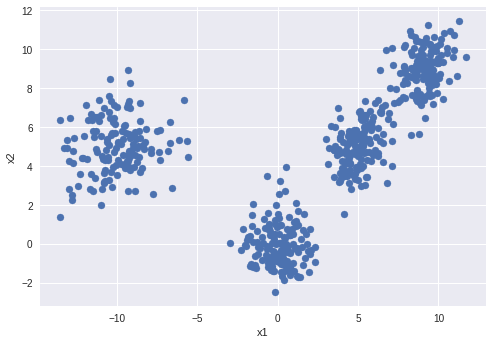

In [3]:
plt.scatter(df["x1"], df["x2"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
def annulus(inner_radius, outer_radius, n = 30, color = "b"):
    """
    annulus, noun (plural annuli) technical
    1) a ring-shaped object, structure, or region.
    2) Mathematics: a plane figure consisting of the area between a pair of concentric circles.
    - - -
    Generate n points with class `color` between the inner radius and the outer radius.
    """
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x1 = r * np.cos(angle)
        x2 = r * np.sin(angle)
        data.append((x1, x2))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x1"] = xs
    df["x2"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color = "r")
df2 = annulus(8, 10, 300, color = "b")
df_circ = pd.concat([df1, df2])

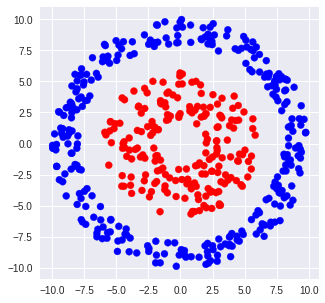

In [5]:
plt.figure(figsize = (5, 5))
plt.scatter(df_circ["x1"], df_circ["x2"], c = df_circ["color"])
plt.show()

## K-Means with scikit-learn

In [6]:
# Plot the data
def set_colors(labels, colors = "rgbykcm"):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [16]:
# Fit a k-means estimator
estimator = KMeans(n_clusters = 2)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

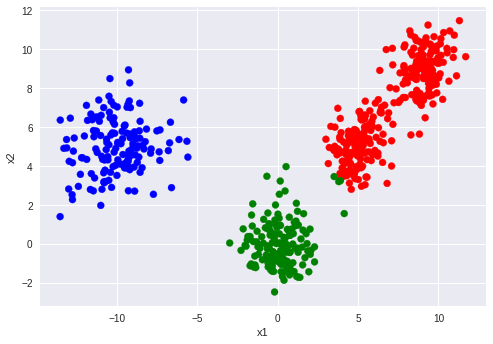

In [15]:
colors = set_colors(labels)
plt.scatter(df["x1"], df["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Let's try it with `k=4` this time.

In [21]:
estimator = KMeans(n_clusters = 4)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({2: 152, 1: 150, 0: 149, 3: 149})


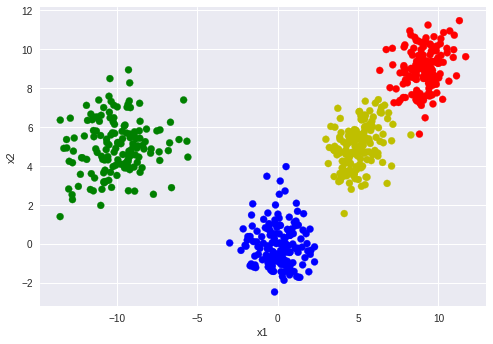

In [22]:
colors = set_colors(labels)
plt.scatter(df["x1"], df["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Let's try the circular data.

In [17]:
estimator = KMeans(n_clusters = 2)
X = df_circ[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({0: 252, 1: 248})


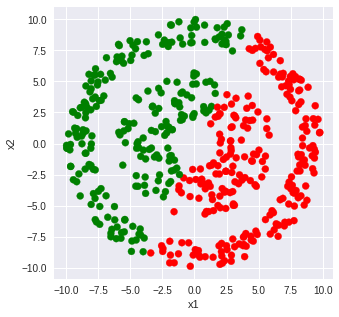

In [18]:
colors = set_colors(labels)
plt.figure(figsize = (5, 5))
plt.scatter(df_circ["x1"], df_circ["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Ouch! No so great on this dataset. Now let's try some real data.

In [23]:
of_df = pd.read_csv("../../../../data/old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


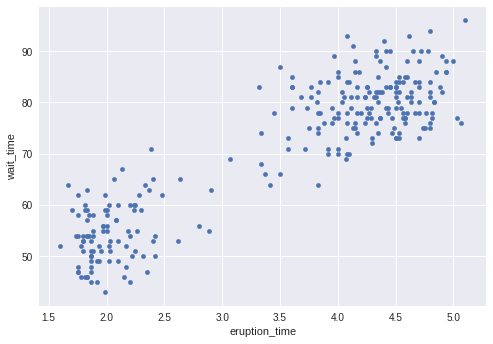

In [24]:
of_df.plot.scatter(x = "eruption_time", y = "wait_time")
plt.show()

In [35]:
# Fit a k-means estimator
estimator = KMeans(n_clusters = 2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

Counter({0: 172, 1: 100})


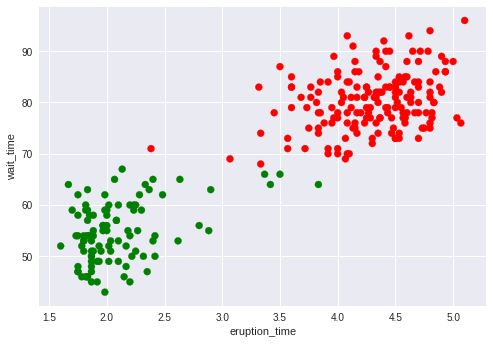

In [36]:
# Plot the data
colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c = colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

In [37]:
estimator.cluster_centers_

array([[  4.29793023,  80.28488372],
       [  2.09433   ,  54.75      ]])

In [ ]:
estimator.

## Exercise: k-means
For the Iris data set, fit and plot k-means models to:
- sepal_length and petal_length, for k=2 and k=3
- sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

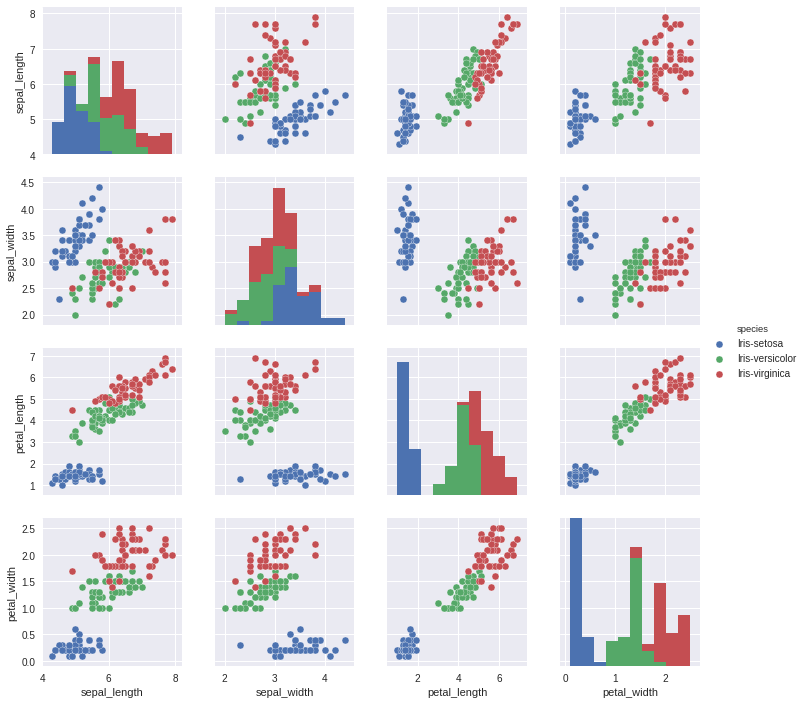

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
iris = pd.read_csv("../../../../data/iris.data")

sns.pairplot(iris, hue = "species")
plt.show()

iris.tail()

In [ ]:
## Exercise Answers here
# Fit a k-means estimator
# Check the labels

# <Code Here>

In [ ]:
# Plot the results

# <Code Here>

In [ ]:
# Calculate some metric
# Hint: metrics.adjusted_rand_score

# <Code Here>

## DBSCAN

In [42]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps = 0.85, min_samples = 10)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({1: 287, 0: 145, 2: 116, -1: 52})


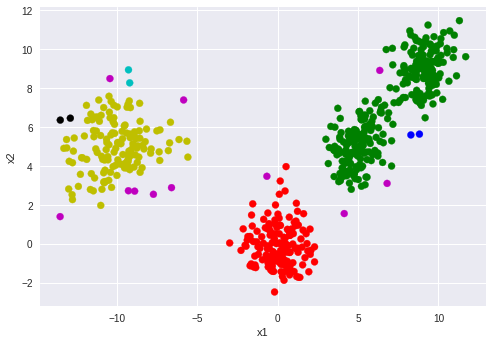

In [41]:
colors = set_colors(labels)
plt.scatter(df["x1"], df["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [30]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps = 0.8, min_samples = 10)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({1: 144, 0: 143, 2: 141, 3: 108, -1: 64})


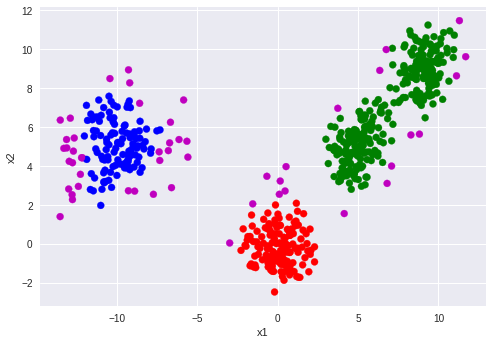

In [43]:
colors = set_colors(labels)
plt.scatter(df["x1"], df["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [55]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps = 2, min_samples = 10)
X = df_circ[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({1: 300, 0: 200})


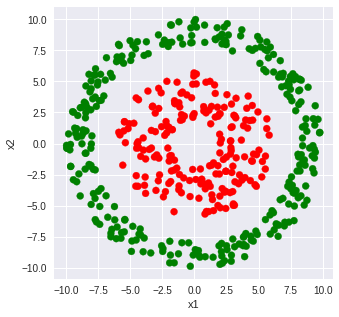

In [56]:
colors = set_colors(labels)
plt.figure(figsize = (5, 5))
plt.scatter(df_circ["x1"], df_circ["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Much better than k-means on this data set! Let's try to cook up something that DBSCAN does not work as well on.

In [45]:
## Create some synthetic data
data = []
dist = multivariate_normal(mean = [0,0], cov = [[6, 12], [1, 6]])
for i in range(50):
    data.append(dist.rvs())

dist = multivariate_normal(mean = [10, 10], cov = [[1, 1.1], [0.2, 0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns = ["x1", "x2"])
df2.head()

,x1,x2
0,-1.465168,-1.537417
1,-1.173543,0.759477
2,-1.623600,-2.124567
3,0.072052,0.403239
4,2.543438,0.488996


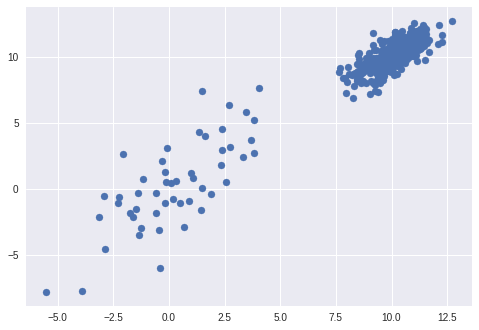

In [46]:
plt.scatter(df2["x1"], df2["x2"])
plt.show()

In [47]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps = 2, min_samples = 10)
X = df2[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({1: 400, 0: 33, -1: 17})


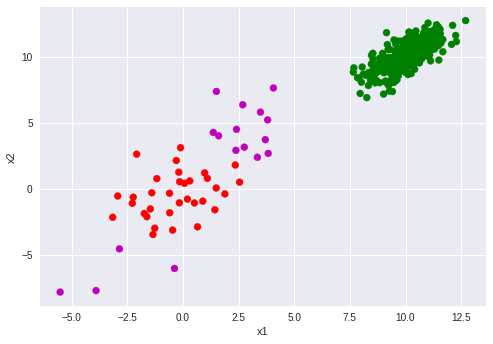

In [48]:
colors = set_colors(labels)
plt.scatter(df2["x1"], df2["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Exercise: DBSCAN
For the Iris dataset, fit and plot DBSCAN models to:
- sepal_length and petal_length
- sepal_width and petal_width
Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

In [ ]:
## Exercise Answers here
# Fit a DBSCAN
estimator = DBSCAN(eps = 0.5, min_samples = 10)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

In [ ]:
colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c = colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

In [ ]:
## Exercise Answers here
# Fit a DBSCAN
# Clusters are given in the labels_ attribute

# <Code Here>

In [ ]:
# Plot the results

# <Code Here>

## Hierarchical Clustering

In [57]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters = 4)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({2: 152, 0: 150, 3: 150, 1: 148})


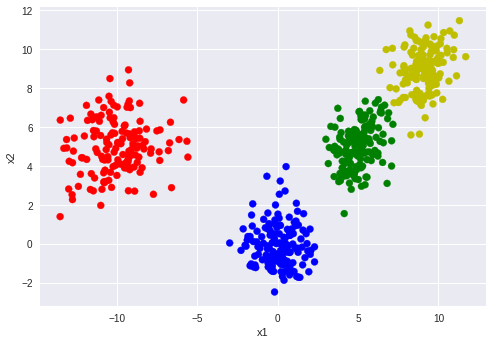

In [58]:
colors = set_colors(labels)
plt.scatter(df["x1"], df["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [51]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters = 2)
X = df_circ[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

Counter({0: 325, 1: 175})


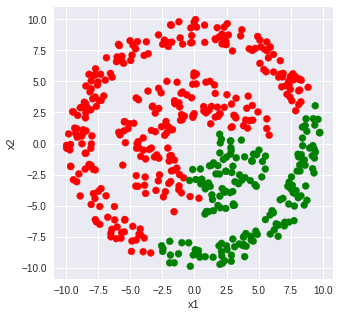

In [52]:
colors = set_colors(labels)
plt.figure(figsize = (5, 5))
plt.scatter(df_circ["x1"], df_circ["x2"], c = colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [53]:
## Silhouette Coefficient
from sklearn import metrics

estimator = KMeans(n_clusters = 4)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))
print(metrics.silhouette_score(X, labels, metric = "euclidean"))

Counter({2: 152, 0: 150, 1: 149, 3: 149})
0.70430958567


In [54]:
estimator = DBSCAN(eps = 1.2, min_samples = 10)
X = df[["x1", "x2"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))
print(metrics.silhouette_score(X, labels, metric = "euclidean"))

Counter({1: 296, 0: 149, 2: 142, -1: 13})
0.630721810561


### Bigger is better, so k-means was a better clustering algorithm on this data set.